<a href="https://colab.research.google.com/github/luisriego/Analise-de-dados-com-Python-e-Pandas/blob/main/excel_init.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# Leitura de arquivos excel
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [3]:
# Concatenar os arquivos excel
df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
df.sample(7)

,Cidade,Data,Vendas,LojaID,Qtde
121,Fortaleza,2019-03-02,41.55,981,3
122,Fortaleza,2019-03-02,235.06,983,3
87,Natal,2019-01-02,135.19,1034,2
92,Salvador,2019-01-01,4.57,1035,1
47,Aracaju,2018-01-01,80.46,1520,2
0,Natal,2018-08-27,606.00,853,2
73,Natal,2018-01-05,773.00,852,2


In [7]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [8]:
# Alterar tipo de dado
df["LojaID"] = df["LojaID"].astype(object)

In [9]:
# Obter os tipos das colunas
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [10]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [11]:
# Criar a coluna Receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [12]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [13]:
# Obter a maior receita
df["Receita"].max()

3544.0

In [14]:
# Obter a menor receita
df["Receita"].min()

3.34

In [15]:
# Obter as maiores receitas
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [16]:
# Obter as menores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [17]:
# Obter a receita por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [18]:
# Obter os valores maiores da receita de maior a menor
df.sort_values("Receita",ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [19]:
# Converter datetime a int64 para testes
df["Data"] = df["Data"].astype("int64")

In [20]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [21]:
# Converter data em formato int64 a datetime
df["Data"] = pd.to_datetime(df["Data"])

In [22]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [23]:
# Obter a receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [24]:
# Criar a coluna ano
df["Ano_Venda"] = df["Data"].dt.year

In [25]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
165,Natal,2019-01-02,11.54,1037,1,11.54,2019
111,Recife,2019-03-02,8.00,981,3,24.00,2019
129,Fortaleza,2019-03-02,35.34,982,7,247.38,2019
91,Aracaju,2018-01-01,200.85,1522,6,1205.10,2018
71,Salvador,2019-01-01,21.36,1035,2,42.72,2019


In [26]:
# Criar coluna mes e dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [27]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
105,Fortaleza,2019-01-01,174.66,1004,1,174.66,2019,1,1
38,Salvador,2019-01-01,165.34,1034,3,496.02,2019,1,1
110,Salvador,2019-03-02,185.93,1036,3,557.79,2019,3,2
176,Natal,2019-01-02,19.42,1035,3,58.26,2019,1,2
96,Recife,2019-01-01,165.36,982,7,1157.52,2019,1,1


In [28]:
# Obter a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [29]:
# Calcular a diferencia de dias
df["Diferenca_dias"] = df["Data"] - df["Data"].min()

In [30]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias
88,Salvador,2019-01-01,31.20,1036,1,31.20,2019,1,1,365 days
178,Natal,2019-01-02,39.28,1037,3,117.84,2019,1,2,366 days
191,Natal,2019-01-02,173.59,1034,2,347.18,2019,1,2,366 days
170,Salvador,2019-01-02,9.26,1035,3,27.78,2019,1,2,366 days
42,Salvador,2019-01-01,44.28,1034,1,44.28,2019,1,1,365 days


In [31]:
#Obter tambem o trimestre da venda
df["Trimestre_venda"] = df["Data"].dt.quarter

In [32]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_venda
78,Fortaleza,2019-01-01,37.66,1005,2,75.32,2019,1,1,365 days,1
153,Natal,2019-01-02,17.41,1035,2,34.82,2019,1,2,366 days,1
14,Aracaju,2018-01-01,148.21,1521,3,444.63,2018,1,1,0 days,1
38,Aracaju,2018-01-01,142.46,1520,1,142.46,2018,1,1,0 days,1
24,Aracaju,2018-01-01,151.04,1522,6,906.24,2018,1,1,0 days,1


In [33]:
# Filtrado de vendas por ano e mes
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [34]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_venda
113,Recife,2019-03-02,38.63,980,2,77.26,2019,3,2,425 days,1
119,Salvador,2019-03-02,136.37,1034,2,272.74,2019,3,2,425 days,1
42,Natal,2019-03-02,775.00,854,2,1550.00,2019,3,2,425 days,1
124,Salvador,2019-03-02,44.82,1034,3,134.46,2019,3,2,425 days,1
132,Salvador,2019-03-02,19.61,1036,2,39.22,2019,3,2,425 days,1
130,Recife,2019-03-02,12.36,983,4,49.44,2019,3,2,425 days,1
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2019,3,2,425 days,1
114,Fortaleza,2019-03-02,16.82,983,4,67.28,2019,3,2,425 days,1
125,Fortaleza,2019-03-02,37.60,983,4,150.40,2019,3,2,425 days,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1


In [35]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

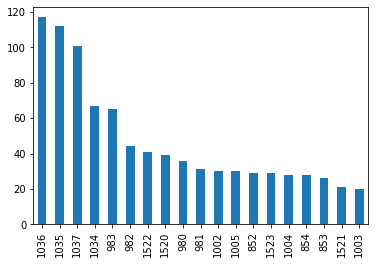

In [36]:
df["LojaID"].value_counts(ascending=False).plot.bar()

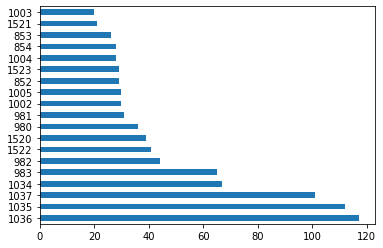

In [37]:
# Gráfica de barras horizontais de menor a maior
df["LojaID"].value_counts().plot.barh()

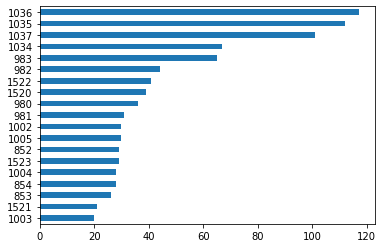

In [42]:
# Gráfica de barras horizontais de maior a menor
df["LojaID"].value_counts(ascending=True).plot.barh();

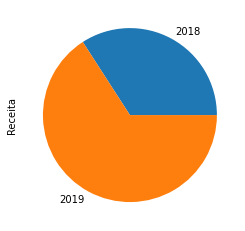

In [44]:
# Obter gráfica de Pizza para a receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [45]:
# Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

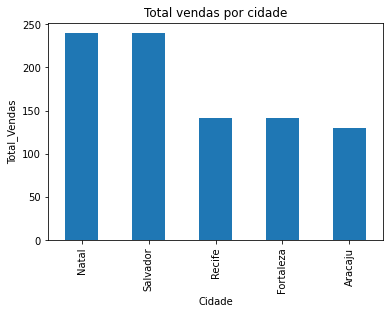

In [48]:
# Adicionar um título e alterar o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total_Vendas");

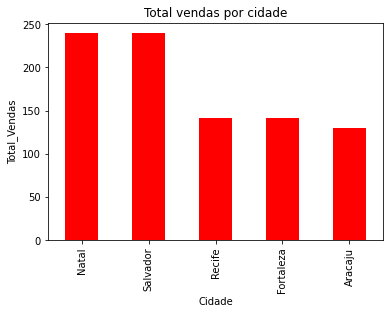

In [49]:
# Alterar a cor da barra
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total_Vendas");

In [50]:
# Alterar o estilo
plt.style.use("ggplot")

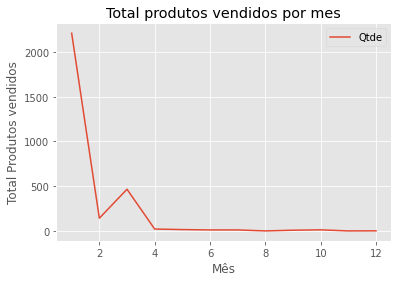

In [56]:
# Alterar a cor da barra
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title="Total produtos vendidos por mes")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend();

In [57]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [58]:
# Selecionar apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

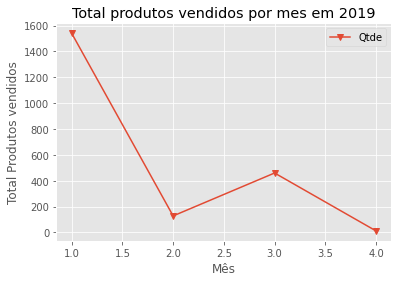

In [60]:
# Total produtos vendidos por mês
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(title="Total produtos vendidos por mes em 2019", marker ="v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend();

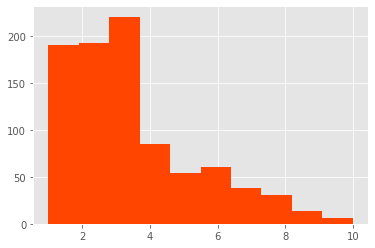

In [61]:
plt.hist(df["Qtde"], color="orangered");

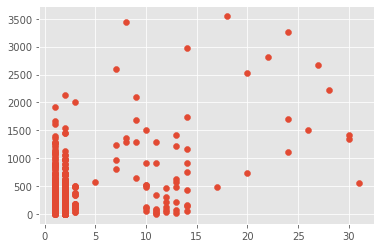

In [63]:
# Concentração de vendas
plt.scatter(x=df_2019["Dia_Venda"] , y=df_2019["Receita"]);

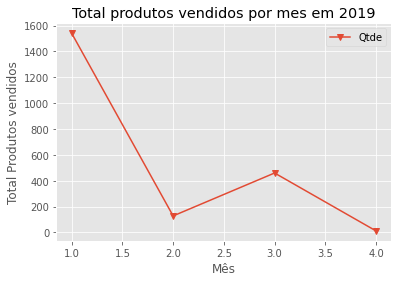

In [64]:
# Salvar total produtos vendidos por mês
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(title="Total produtos vendidos por mes em 2019", marker ="v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend()
plt.savefig("grafico_qtde_X_mes.png");